# Computational Statistics

In [1]:
%matplotlib notebook
%pylab
import time, multiprocessing
import pandas

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


### Generating Random Data

In [2]:
N = 2**24
x = random.rand(N)

## Computing Minimum with Multiple CPUs

In [3]:
%%time
print('Minimum Value = %g' %(min(x)))

Minimum Value = 4.72667e-08
CPU times: user 1.38 s, sys: 4 ms, total: 1.39 s
Wall time: 1.38 s


In [4]:
def minimum(x,q):
    q.put(min(x))
    
def compute_min(x,np):
    N = len(x)
    jobs = []
    q = multiprocessing.Queue()
    for i in range(np):
        i1 = int(i*N/np)
        i2 = int((i+1)*N/np)
        job = multiprocessing.Process(target=minimum,args=[x[i1:i2],q])
        jobs.append(job)
        
    for job in jobs:
        job.start()
    
    for job in jobs:
        job.join()

    min_list = []
    while not q.empty():
        min_list.append(q.get())

    min_value = 0;
    min_value = min(min_list)
    return min_value

In [5]:
procs = 2**arange(0,5)
tdata_min = empty(procs.shape)
min_value = []
for i,np in enumerate(procs):
    tr = %timeit -n 2 -r 5 -q -o pass; min_value.append(compute_min(x,np))
    tdata_min[i] = tr.best
print('Minimum Value = %g' %(min_value[0]))
Sp = [tdata_min[0]/items for items in tdata_min]
Ep = [Sp[i]/procs[i] for i in range(0,len(Sp))]


Minimum Value = 4.72667e-08


In [6]:
p = pandas.Series(procs,dtype='d')
t = pandas.Series(tdata_min,dtype='d')
sp = pandas.Series(Sp, dtype='d')
ep = pandas.Series(Ep, dtype='d')
df = pandas.DataFrame({'Processors' : p,
                       'Ep' : Ep,
                       'Sp' : Sp,
                       't(sec)' : t
                    })
df = df.reindex(['Processors','t(sec)', 'Sp', 'Ep'], axis=1)
df.style
pandas.io.formats.style.Styler(df, caption ='Timing Report for Computing Minimum Using Multiple CPUs')

,Processors,t(sec),Sp,Ep
0,1,1.38937,1,1
1,2,0.694116,2.00163,1.00082
2,4,0.366175,3.79426,0.948566
3,8,0.202683,6.85487,0.856859
4,16,0.137957,10.071,0.629439


### Processors vs Time Taken (Minimum)

<IPython.core.display.Javascript object>


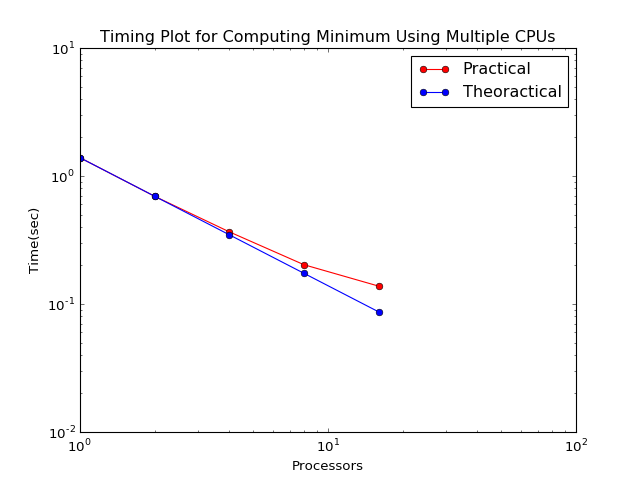

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f8c3c1489b0>>

In [7]:
t_theo = [tdata_min[0], tdata_min[0]/2, tdata_min[0]/4, tdata_min[0]/8, tdata_min[0]/16]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-0, 1e2)
ax.set_title("Timing Plot for Computing Minimum Using Multiple CPUs")
ax.set_xlabel('Processors')
ax.set_ylabel('Time(sec)')
l1,= ax.plot(p, tdata_min, "o-", color='r')
l2,= ax.plot(p, t_theo, "o-", color='b')
ax.legend([l1, l2],["Practical", "Theoractical"])
fig.show

### Processors vs Efficieny (Minimum)

<IPython.core.display.Javascript object>


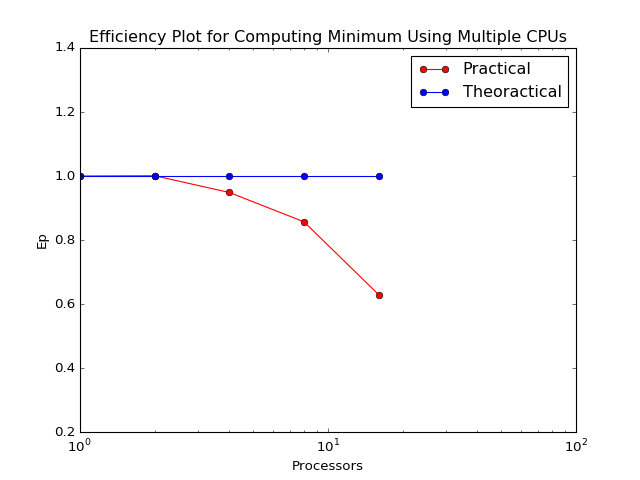

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f8c3c1482e8>>

In [8]:
ep_theo = [1, 1, 1, 1, 1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_xlim(1e-0, 1e2)
ax.set_ylim(0.2, 1.4)
ax.set_title("Efficiency Plot for Computing Minimum Using Multiple CPUs")
ax.set_xlabel('Processors')
ax.set_ylabel('Ep')
l1,= ax.plot(p, Ep, "o-", color='r')
l2,= ax.plot(p, ep_theo, "o-", color='b')
ax.legend([l1, l2],["Practical", "Theoractical"])
fig.show

## Computing Maximum with Multiple CPUs

In [9]:
%%time
print('Maximum Value = %g' %(max(x)))

Maximum Value = 1
CPU times: user 1.38 s, sys: 922 µs, total: 1.39 s
Wall time: 1.38 s


In [10]:
def maximum(x,q):
    q.put(max(x))
    
def compute_max(x,np):
    N = len(x)
    jobs = []
    q = multiprocessing.Queue()
    for i in range(np):
        i1 = int(i*N/np)
        i2 = int((i+1)*N/np)
        job = multiprocessing.Process(target=maximum,args=[x[i1:i2],q])
        jobs.append(job)
        
    for job in jobs:
        job.start()
    
    for job in jobs:
        job.join()

    max_list = []
    while not q.empty():
        max_list.append(q.get())
    max_value = 0;
    max_value = max(max_list)
    return max_value

In [11]:
procs = 2**arange(0,5)
tdata_max = empty(procs.shape)
max_value = []
for i,np in enumerate(procs):
    tr = %timeit -n 2 -r 5 -q -o pass; max_value.append(compute_max(x,np))
    tdata_max[i] = tr.best
print('Maximum Value = %g' %(max_value[0]))
Sp_max = [tdata_max[0]/items for items in tdata_max]
Ep_max = [Sp_max[i]/procs[i] for i in range(0,len(Sp))]

Maximum Value = 1


In [12]:
p_max = pandas.Series(procs,dtype='d')
t_max = pandas.Series(tdata_max,dtype='d')
sp_max = pandas.Series(Sp_max, dtype='d')
ep_max = pandas.Series(Ep_max, dtype='d')
df_max = pandas.DataFrame({'Processors' : p_max,
                       'Ep' : Ep_max,
                       'Sp' : Sp_max,
                       't(sec)' : t_max
                    })
df_max = df.reindex(['Processors','t(sec)', 'Sp', 'Ep'], axis=1)
df_max.style
pandas.io.formats.style.Styler(df_max, caption ='Timing Report for Computing Maximum Using Multiple CPUs')

,Processors,t(sec),Sp,Ep
0,1,1.38937,1,1
1,2,0.694116,2.00163,1.00082
2,4,0.366175,3.79426,0.948566
3,8,0.202683,6.85487,0.856859
4,16,0.137957,10.071,0.629439


## Processors vs Time Taken (Maximum)

<IPython.core.display.Javascript object>


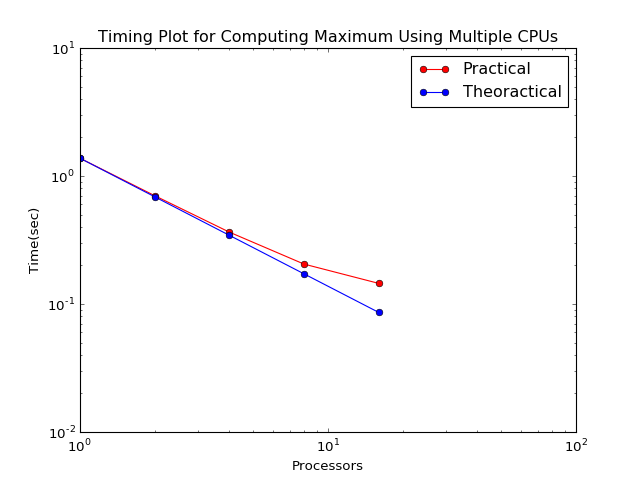

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f8c3c06a208>>

In [13]:
t_theo = [tdata_max[0], tdata_max[0]/2, tdata_max[0]/4, tdata_max[0]/8, tdata_max[0]/16]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-0, 1e2)
ax.set_title("Timing Plot for Computing Maximum Using Multiple CPUs")
ax.set_xlabel('Processors')
ax.set_ylabel('Time(sec)')
l1,= ax.plot(p, tdata_max, "o-", color='r')
l2,= ax.plot(p, t_theo, "o-", color='b')
ax.legend([l1, l2],["Practical", "Theoractical"])
fig.show

### Processors vs Efficieny (Maximum)

<IPython.core.display.Javascript object>


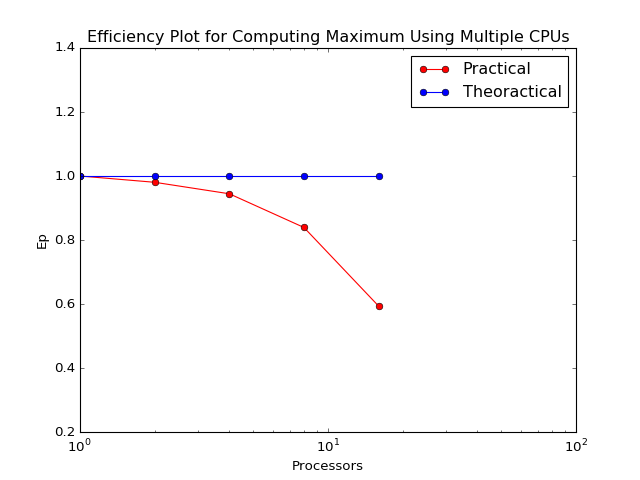

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f8c3c068208>>

In [14]:
ep_theo = [1, 1, 1, 1, 1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_xlim(1e-0, 1e2)
ax.set_ylim(0.2, 1.4)
ax.set_title("Efficiency Plot for Computing Maximum Using Multiple CPUs")
ax.set_xlabel('Processors')
ax.set_ylabel('Ep')
l1,= ax.plot(p, Ep_max, "o-", color='r')
l2,= ax.plot(p, ep_theo, "o-", color='b')
ax.legend([l1, l2],["Practical", "Theoractical"])
fig.show

## Computing Standard Deviation with Multiple CPUs

In [15]:
def vsum(x,q):
    q.put(sum(x))
    
def compute_mean(np):
    N = len(x)
    jobs = []
    for i in range(np):
        i1 = (int(i*N/np))
        i2 = (int((i+1)*N/np))
        job = multiprocessing.Process(target=vsum,args=[x[i1:i2],q])
        jobs.append(job)
        
    for job in jobs:
        job.start()
    
    for job in jobs:
        job.join()

    s = 0
    while not q.empty():
        s += q.get()
        
    return s/N

def stdDevFun(x,mean,q):
    q.put(sum((x-mean)**2))

def std_dev(np):
    mean_val = compute_mean(np)
    jobs = []
    for i in range(np):
        i1 = (int(i*N/np))
        i2 = (int((i+1)*N/np))
        job = multiprocessing.Process(target=stdDevFun,args=[x[i1:i2],mean_val,q])
        jobs.append(job)
        
    for job in jobs:
        job.start()
    
    for job in jobs:
        job.join()

    s = 0
    while not q.empty():
        s += q.get()
        
    return sqrt((s/N))
    

In [16]:
procs = 2**arange(0,5)
tdata_std = empty(procs.shape)
stdDev_value = []
q = multiprocessing.Queue()
for i,np in enumerate(procs):
    tr = %timeit -n 2 -r 5 -q -o pass; stdDev_value.append(std_dev(np))
    tdata_std[i] = tr.best
print(stdDev_value[0])
Sp_std = [tdata_std[0]/items for items in tdata_std]
Ep_std = [Sp_std[i]/procs[i] for i in range(0,len(Sp))]
# p = pandas.Series(procs,dtype='d')
# t = pandas.Series(tdata_std,dtype='d')
# df = pandas.DataFrame({'p' : p, 't' : t})
# df

0.288696084376


In [17]:
p_std = pandas.Series(procs,dtype='d')
t_std = pandas.Series(tdata_std,dtype='d')
sp_std = pandas.Series(Sp_std, dtype='d')
ep_std = pandas.Series(Ep_std, dtype='d')
df_std = pandas.DataFrame({'Processors' : p_std,
                       'Ep' : ep_std,
                       'Sp' : sp_std,
                       't(sec)' : t_std
                    })
df_std = df_std.reindex(['Processors','t(sec)', 'Sp', 'Ep'], axis=1)
df_std.style
pandas.io.formats.style.Styler(df_std, caption ='Timing Report for Computing Standard Deviation Using Multiple CPUs')

,Processors,t(sec),Sp,Ep
0,1,0.156812,1,1
1,2,0.0939546,1.66902,0.834511
2,4,0.0782938,2.00287,0.500717
3,8,0.0872725,1.79681,0.224601
4,16,0.131921,1.18868,0.0742927


### Processors vs Time Taken (Std. Dev.)

<IPython.core.display.Javascript object>


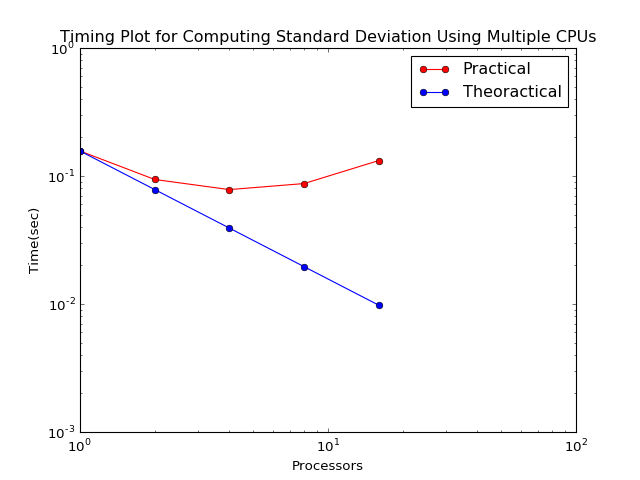

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f8c2f8fedd8>>

In [18]:
t_theo = [tdata_std[0], tdata_std[0]/2, tdata_std[0]/4, tdata_std[0]/8, tdata_std[0]/16]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1e-0, 1e2)
ax.set_title("Timing Plot for Computing Standard Deviation Using Multiple CPUs")
ax.set_xlabel('Processors')
ax.set_ylabel('Time(sec)')
l1,= ax.plot(p, tdata_std, "o-", color='r')
l2,= ax.plot(p, t_theo, "o-", color='b')
ax.legend([l1, l2],["Practical", "Theoractical"])
fig.show

### Processors vs Efficieny (Std. Dev.)

<IPython.core.display.Javascript object>


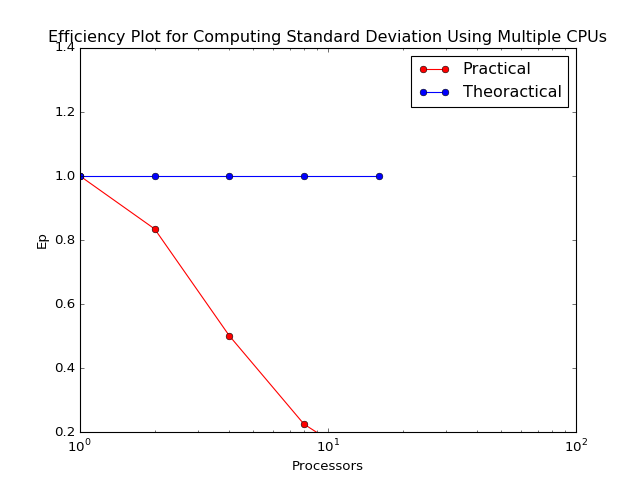

<bound method Figure.show of <matplotlib.figure.Figure object at 0x7f8c24b2dcc0>>

In [19]:
ep_theo = [1, 1, 1, 1, 1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_xlim(1e-0, 1e2)
ax.set_ylim(0.2, 1.4)
ax.set_title("Efficiency Plot for Computing Standard Deviation Using Multiple CPUs")
ax.set_xlabel('Processors')
ax.set_ylabel('Ep')
l1,= ax.plot(p, Ep_std, "o-", color='r')
l2,= ax.plot(p, ep_theo, "o-", color='b')
ax.legend([l1, l2],["Practical", "Theoractical"])
fig.show

In [1]:
ipython nbconvert --to latex HW1-2.ipynb

SyntaxError: invalid syntax (<ipython-input-1-da3c6563a000>, line 1)

In [ ]:
import nbcconvert